In [3]:
import pandas as pd

# Define the file path

file_path = "C:/Users/Lenovo/OneDrive/Bureau/Demandforecast/cleaned_demand_forecast.csv"

# Read the CSV file into a DataFrame

df = pd.read_csv(file_path)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119317 entries, 0 to 2119316
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   start_station_name  object 
 1   end_station_name    object 
 2   started_at_day      object 
 3   started_at_hour     int64  
 4   duration_mins       float64
 5   distance            float64
 6   distance_category   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 113.2+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for c in  df.columns:
    if(df[c].dtype=='object'):
        df[c]=le.fit_transform(df[c])
    else:
        df[c]=df[c]
        
df.head(3)    


,start_station_name,end_station_name,started_at_day,started_at_hour,duration_mins,distance,distance_category
0,147,150,3,12,8.0,1938.471532,1.0
1,223,495,0,19,29.0,2235.093936,2.0
2,147,495,1,15,38.0,6266.008490,6.0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df_scaled = df[['start_station_name','end_station_name','started_at_day','started_at_hour', 'duration_mins', 'distance', 'distance_category']]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled[['start_station_name','end_station_name','started_at_day','started_at_hour', 'duration_mins', 'distance', 'distance_category']])

df_scaled_fit = pd.DataFrame(df_scaled_fit, columns=['start_station_name','end_station_name','started_at_day','started_at_hour', 'duration_mins', 'distance', 'distance_category'])

In [7]:
from scipy.stats import zscore
import numpy as np
z_scores = np.abs(zscore(df_scaled_fit))
z_scores

,start_station_name,end_station_name,started_at_day,started_at_hour,duration_mins,distance,distance_category
0,1.119887,1.105126,0.052500,0.490749,0.083708,0.455357,0.676700
1,0.788042,0.421964,1.506084,0.896573,0.011400,0.302111,0.164263
2,1.119887,0.421964,0.986556,0.103818,0.052161,1.780418,1.885485
3,1.482476,0.063430,1.611083,0.500195,0.070121,0.340434,0.164263
4,1.482476,0.421964,0.467028,0.302006,0.020303,0.997492,1.189137
...,...,...,...,...,...,...,...
2119312,1.207394,0.399832,0.052500,0.887126,0.301255,1.154474,1.189137
2119313,0.521693,0.386553,1.506084,0.698384,0.083708,0.529050,0.676700
2119314,0.530426,0.386553,0.572027,1.292950,0.020303,0.489213,0.348174
2119315,1.264157,0.386553,0.467028,0.103818,0.015774,0.239555,0.348174


In [8]:
df_scaled = df_scaled_fit[(z_scores < 3).all(axis=1)]


Text(0.5, 1.0, 'Correlation between different fearures')

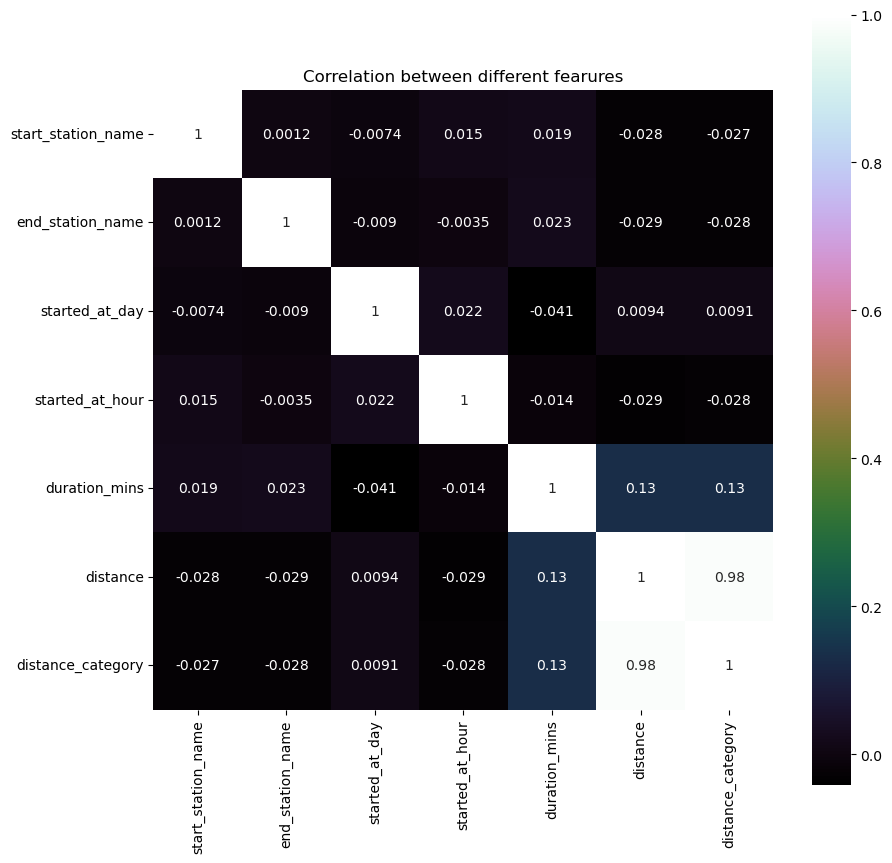

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_scaled.corr(), vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [10]:
df.head()

,start_station_name,end_station_name,started_at_day,started_at_hour,duration_mins,distance,distance_category
0,147,150,3,12,8.0,1938.471532,1.0
1,223,495,0,19,29.0,2235.093936,2.0
2,147,495,1,15,38.0,6266.008490,6.0
3,743,414,6,17,11.0,2160.916763,2.0
4,743,495,2,16,22.0,889.123671,0.0


In [11]:
df.columns

Index(['start_station_name', 'end_station_name', 'started_at_day',
       'started_at_hour', 'duration_mins', 'distance', 'distance_category'],
      dtype='object')

In [12]:
var_list=df_scaled[["start_station_name","started_at_day","distance_category"]]

In [13]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=4)

In [14]:
kmeans.labels_


array([1, 0, 0, ..., 1, 2, 2])

In [15]:
ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list)
    
    ssd.append(kmeans.inertia_)
ssd

[5579472.052074567,
 4085894.660598683,
 3082494.3077720637,
 2452211.8379941913,
 1963714.7717751684,
 1751348.5043478038,
 1642666.25328368,
 1458018.4843640924,
 1364412.9437106238,
 1294368.7015390852]

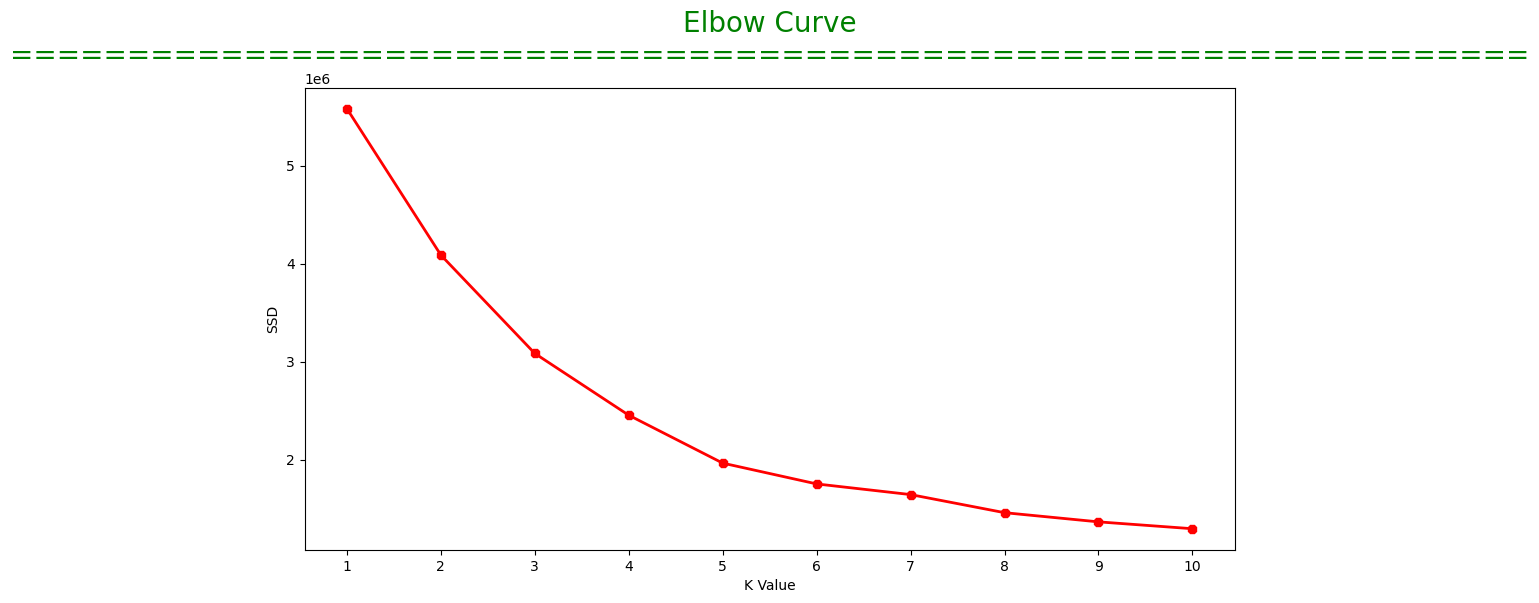

In [16]:
import numpy as np
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

Conclusion - From the above Elbow curve we will take the value of K=5 and rebuild the cluster.

In [17]:
# K=5

kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=5)

In [18]:
kmeans.labels_


array([2, 2, 0, ..., 3, 1, 1])

In [19]:
df_scaled["Label"] = kmeans.labels_
df = pd.concat([df, df_scaled['Label']], axis=1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\984729274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled["Label"] = kmeans.labels_


Text(0.5, 1.0, 'Correlation between different fearures')

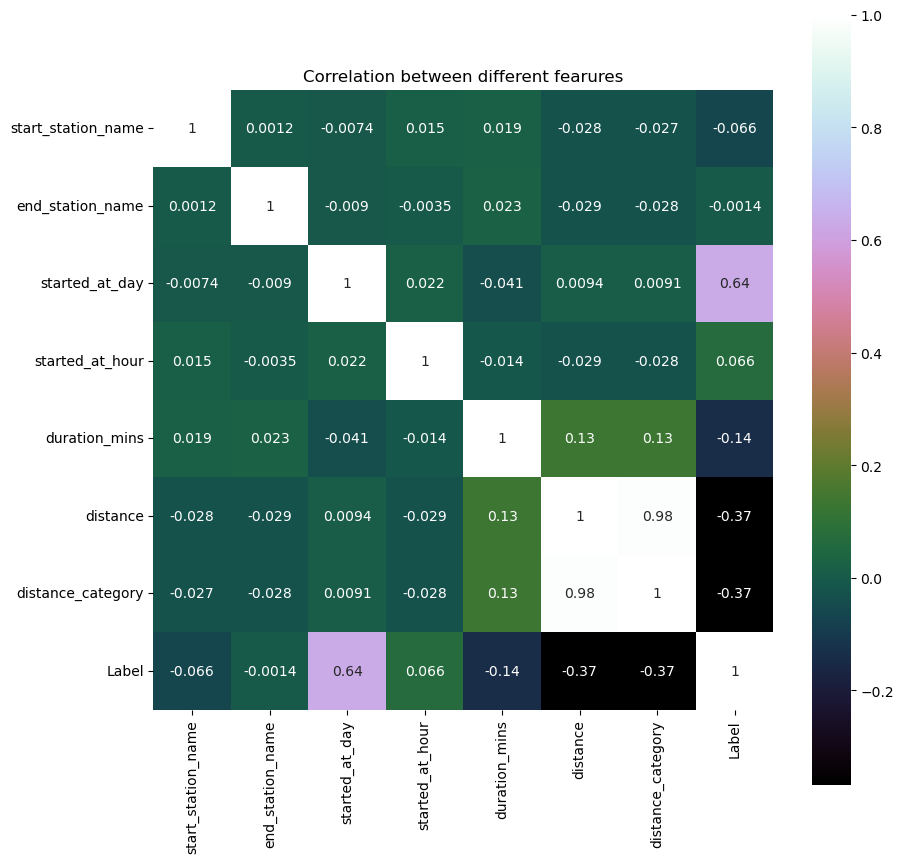

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df_scaled.corr(), vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [21]:
df_scaled.head()


,start_station_name,end_station_name,started_at_day,started_at_hour,duration_mins,distance,distance_category,Label
0,-1.119887,-1.105126,0.052500,-0.490749,-0.083708,-0.455357,-0.676700,2
1,-0.788042,0.421964,-1.506084,0.896573,0.011400,-0.302111,-0.164263,2
2,-1.119887,0.421964,-0.986556,0.103818,0.052161,1.780418,1.885485,0
3,1.482476,0.063430,1.611083,0.500195,-0.070121,-0.340434,-0.164263,4
4,1.482476,0.421964,-0.467028,0.302006,-0.020303,-0.997492,-1.189137,1


In [22]:
df_scaled['Label'].value_counts()

Label
1    607715
2    513752
4    381942
3    337030
0    237180
Name: count, dtype: int64

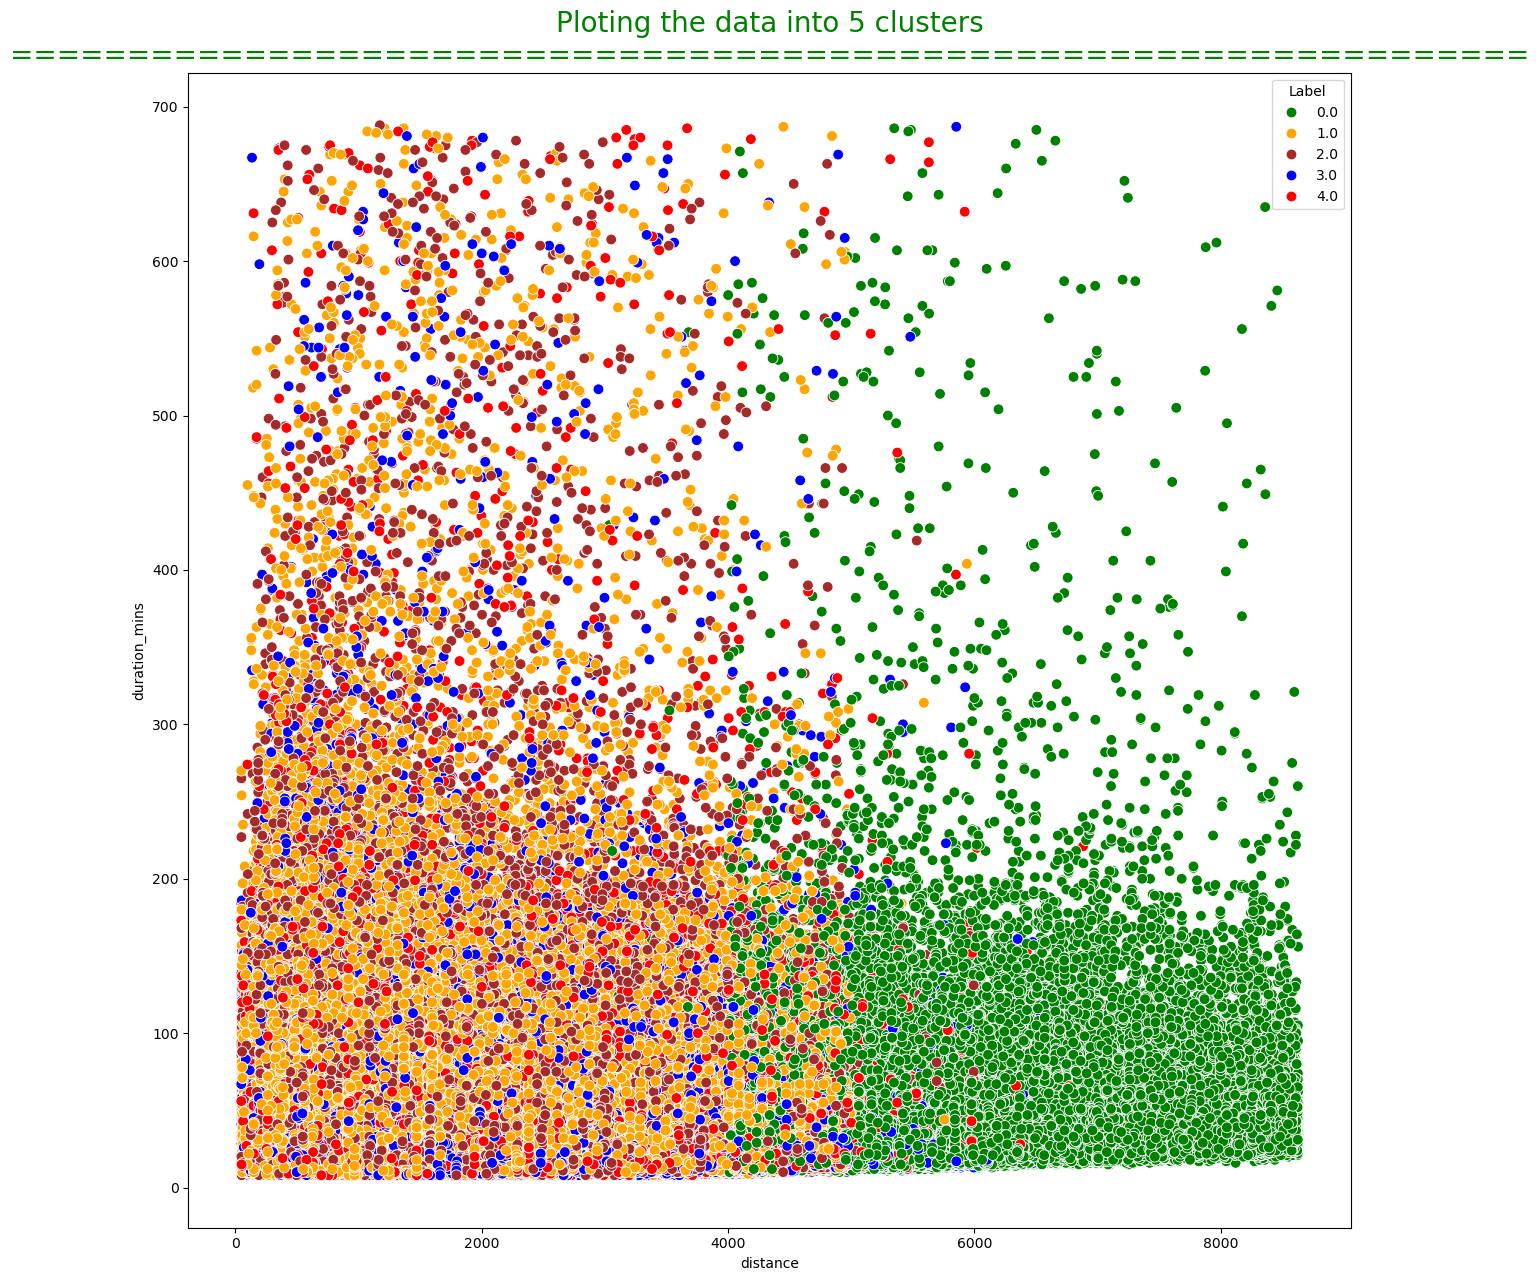

In [23]:
plt.figure(figsize=(15,15))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df, x="distance", y="duration_mins", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\937841815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='duration_mins', data=df, palette="nipy_spectral_r")


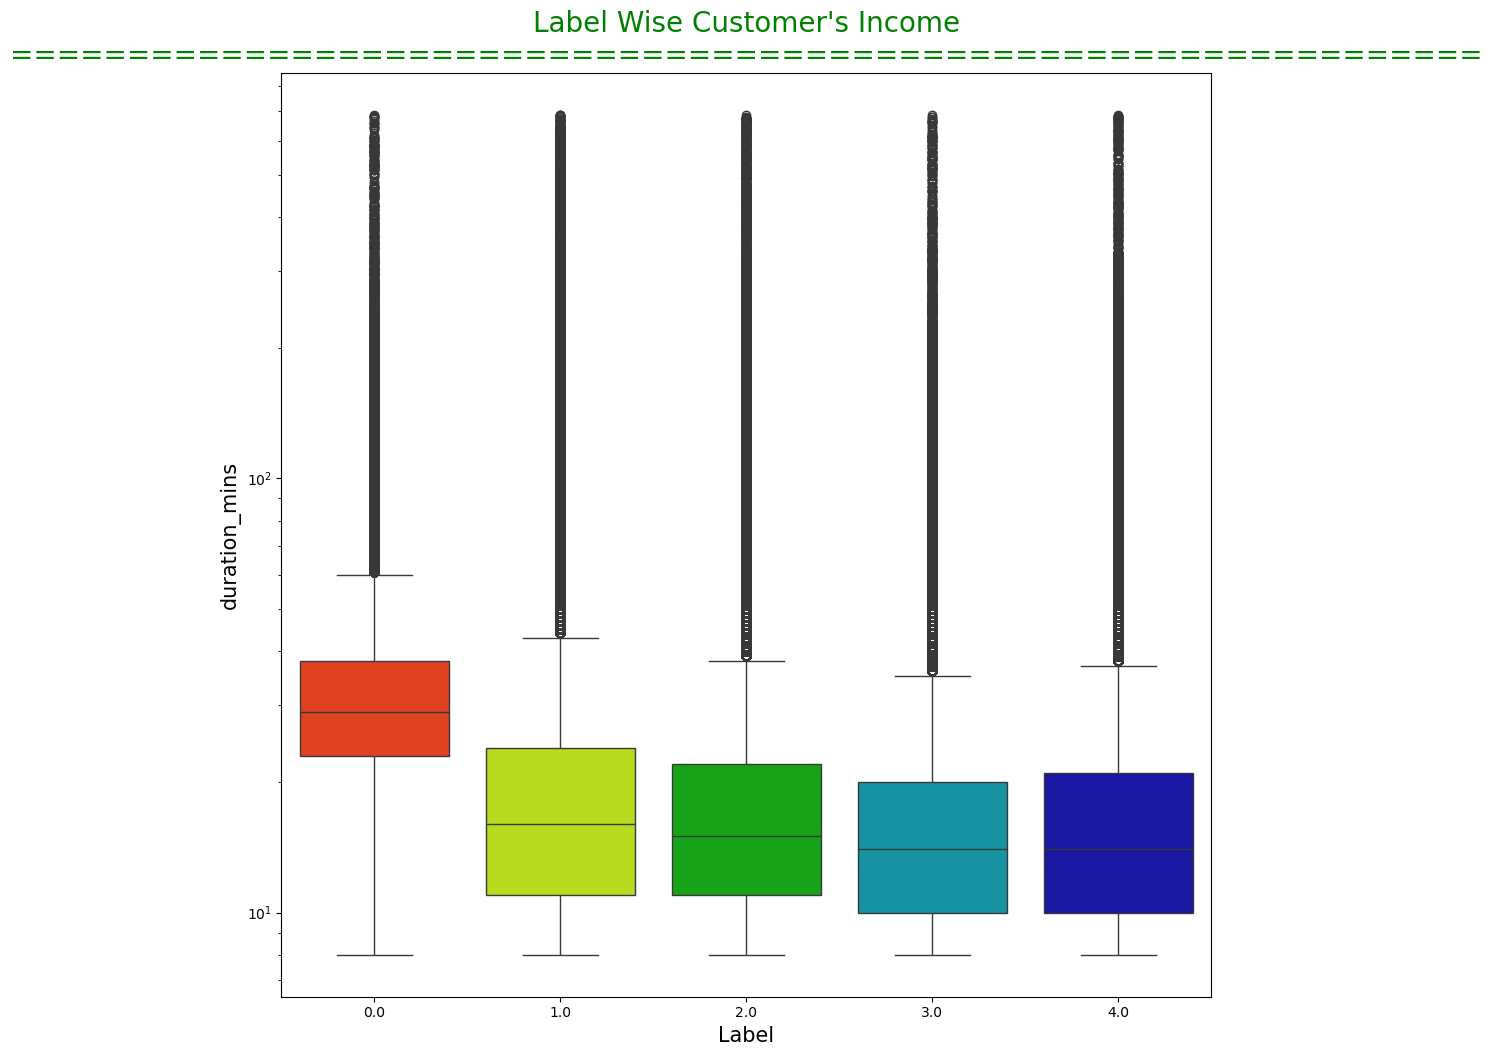

In [24]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Label', y='duration_mins', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.yscale('log')
plt.ylabel(ylabel="duration_mins",fontsize=15)
plt.show()

In [25]:
df.columns

Index(['start_station_name', 'end_station_name', 'started_at_day',
       'started_at_hour', 'duration_mins', 'distance', 'distance_category',
       'Label'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
x=df_scaled
y=df_scaled.drop(columns={'start_station_name', 'end_station_name', 'started_at_day',
       'started_at_hour', 'duration_mins', 'distance', 'distance_category'} )

In [27]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingRegressor


In [28]:
if x.shape[0] != y.shape[0]:
    min_samples = min(x.shape[0], y.shape[0])
    X = x.iloc[:min_samples]
    y = y.iloc[:min_samples]

In [29]:
y = y.to_numpy().reshape(-1)


In [30]:
y

array([2, 2, 0, ..., 3, 1, 1])

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)#+


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 1.0


An accuracy of 1.0  means this model has made perfect predictions on the given dataset.



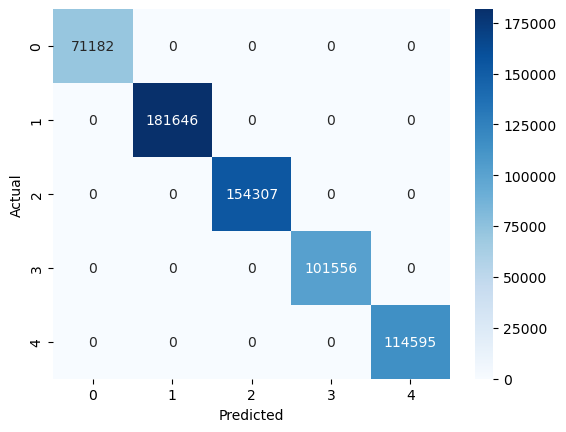

In [78]:
# Compute confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")





Mean Squared Error: 1.1616195143916105e-09


Low MSE

In [34]:
from sklearn.svm import SVC

model = SVC()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError 
from tensorflow.keras.metrics import RootMeanSquaredError

In [46]:
# Convert the Pandas DataFrame to a TensorFlow constant

tensor_data = tf.constant(df_scaled.values, dtype=tf.float32)
tensor_data.shape

TensorShape([2077619, 8])

In [47]:
tensor_data


<tf.Tensor: shape=(2077619, 8), dtype=float32, numpy=
array([[-1.1198874 , -1.1051255 ,  0.05249952, ..., -0.45535746,
        -0.6767001 ,  2.        ],
       [-0.78804237,  0.4219639 , -1.5060841 , ..., -0.3021107 ,
        -0.16426311,  2.        ],
       [-1.1198874 ,  0.4219639 , -0.98655623, ...,  1.7804178 ,
         1.8854848 ,  0.        ],
       ...,
       [-0.5304259 ,  0.38655314,  0.5720274 , ...,  0.48921266,
         0.34817386,  3.        ],
       [ 1.2641566 ,  0.38655314, -0.46702835, ...,  0.23955476,
         0.34817386,  1.        ],
       [ 1.6134671 ,  0.9575518 , -0.46702835, ...,  1.0312059 ,
         0.86061084,  1.        ]], dtype=float32)>

In [48]:
# Shuffle the dataset for randomness

tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(2077619, 8), dtype=float32, numpy=
array([[ 1.4650102 , -1.649566  ,  1.6110831 , ..., -0.07802357,
        -0.16426311,  4.        ],
       [ 1.3252859 , -1.36628   , -0.98655623, ...,  0.9638468 ,
         0.86061084,  1.        ],
       [-1.4648315 ,  0.01031371, -0.46702835, ...,  1.895581  ,
         1.8854848 ,  0.        ],
       ...,
       [ 0.5786348 , -0.8970873 , -0.46702835, ..., -0.16546367,
        -0.16426311,  1.        ],
       [ 0.07650103,  0.01916641,  0.05249952, ..., -0.16243258,
        -0.16426311,  1.        ],
       [ 1.4650102 ,  0.4308166 ,  1.6110831 , ..., -0.10947872,
        -0.16426311,  4.        ]], dtype=float32)>

In [49]:
# Separate features (X) and labels (Y)
X = tensor_data[:, 3:-1]  # Features
Y = tensor_data[:, -1]  # Labels

# Expand dimensions of Y to match model input requirements
Y = tf.expand_dims(Y, axis=-1)

In [53]:
# Define data split ratios
Train_Ratio = 0.8
Validation_Ratio = 0.1
Test_Ratio = 0.1

# Calculate the dataset size
Dataset_Size = len(X)

# Split the data into training, validation, and test sets
X_train = X[:int(Dataset_Size * Train_Ratio)]
Y_train = Y[:int(Dataset_Size * Train_Ratio)]

X_Val = X[int(Dataset_Size * Train_Ratio):int(Dataset_Size * (Train_Ratio + Validation_Ratio))]
Y_Val = Y[int(Dataset_Size * Train_Ratio):int(Dataset_Size * (Train_Ratio + Validation_Ratio))]

X_Test = X[int(Dataset_Size * (Train_Ratio + Validation_Ratio)):]
Y_Test = Y[int(Dataset_Size * (Train_Ratio + Validation_Ratio)):]

print(f'Train set: {X_train.shape}, {Y_train.shape}')
print(f'Validation set: {X_Val.shape}, {Y_Val.shape}')
print(f'Test set: {X_Test.shape}, {Y_Test.shape}')

Train set: (1662095, 4), (1662095, 1)
Validation set: (207762, 4), (207762, 1)
Test set: (207762, 4), (207762, 1)


In [54]:
# Normalize the training data
normalizer = Normalization()
normalizer.adapt(X_train)

# Display normalized data
print(normalizer(X_train)[:5])

tf.Tensor(
[[ 1.0904728e+00 -4.8804912e-01 -1.2890903e-03 -1.0649574e-01]
 [ 1.0904728e+00  4.7637472e-01  1.2659386e+00  1.1300756e+00]
 [-9.6940845e-02  3.9922079e-01  2.3992074e+00  2.3666470e+00]
 [ 4.9676606e-01 -4.1089523e-01 -5.3615868e-01 -7.2478139e-01]
 [ 4.9676606e-01 -4.8804912e-01 -5.7524943e-01 -7.2478139e-01]], shape=(5, 4), dtype=float32)


In [55]:
# Creating the model

from tensorflow.keras.optimizers import Adam  # Optimizer

# Creating the model
model = tf.keras.Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    normalizer,
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=MeanSquaredError(),
    metrics=[RootMeanSquaredError()]
)

# Summary of the model
model.summary()

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,714 (34.04 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 9 (40.00 B)

In [56]:
# Train the model

history = model.fit(
    X_train,
    Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_Val, Y_Val))

Epoch 1/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 1.2928 - root_mean_squared_error: 1.1364 - val_loss: 1.2588 - val_root_mean_squared_error: 1.1219
Epoch 2/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 153s 3ms/step - loss: 1.2598 - root_mean_squared_error: 1.1224 - val_loss: 1.2569 - val_root_mean_squared_error: 1.1211
Epoch 3/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - loss: 1.2584 - root_mean_squared_error: 1.1218 - val_loss: 1.2564 - val_root_mean_squared_error: 1.1209
Epoch 4/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - loss: 1.2578 - root_mean_squared_error: 1.1215 - val_loss: 1.2553 - val_root_mean_squared_error: 1.1204
Epoch 5/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - loss: 1.2578 - root_mean_squared_error: 1.1215 - val_loss: 1.2572 - val_root_mean_squared_error: 1.1212
Epoch 6/50
51941/51941 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - loss: 1.2572 - root_mean_squared_error: 1.1213 - val_loss: 1.2553 - val_root_mean_squared_error: 1.1204
Epoch 7/50
51941/519

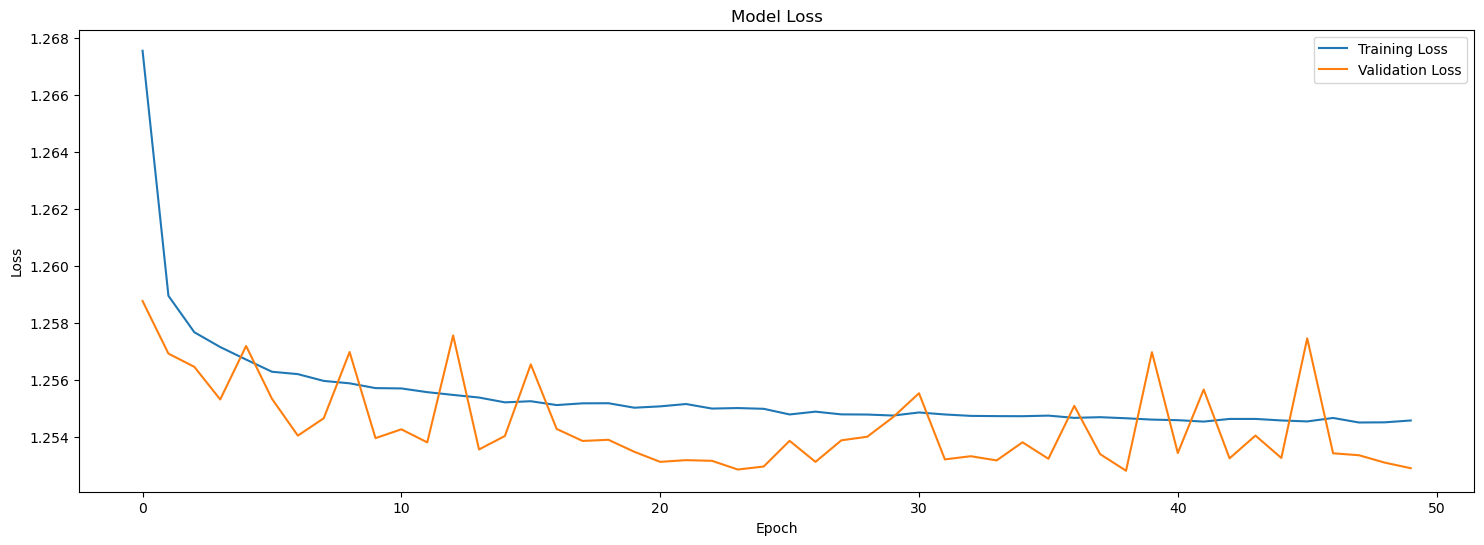

In [57]:
# Plot training & validation loss values

plt.figure(figsize=(18, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [58]:
# Evaluate the model on the test data
test_loss, test_rmse = model.evaluate(X_Test, Y_Test, verbose=0)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 1.119817852973938


In [67]:
baseline_pred = np.mean(y)
baseline_rmse = np.sqrt(mean_squared_error(y, [baseline_pred] * len(Y)))
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 1.2832093916324534


An RMSE of 1.1198 is relatively low, which generally indicates that your model is performing well. 

In [66]:
#Making Predictions

predictions = model.predict(X_Test)

# Compare some predictions with actual values
comparison_df = pd.DataFrame({
    'Actual': Y_Test.numpy().flatten(),
    'Predicted': predictions.flatten()
})

comparison_df.head()

6493/6493 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


,Actual,Predicted
0,4.0,2.482939
1,2.0,2.403215
2,1.0,1.888425
3,1.0,2.267022
4,1.0,2.351269


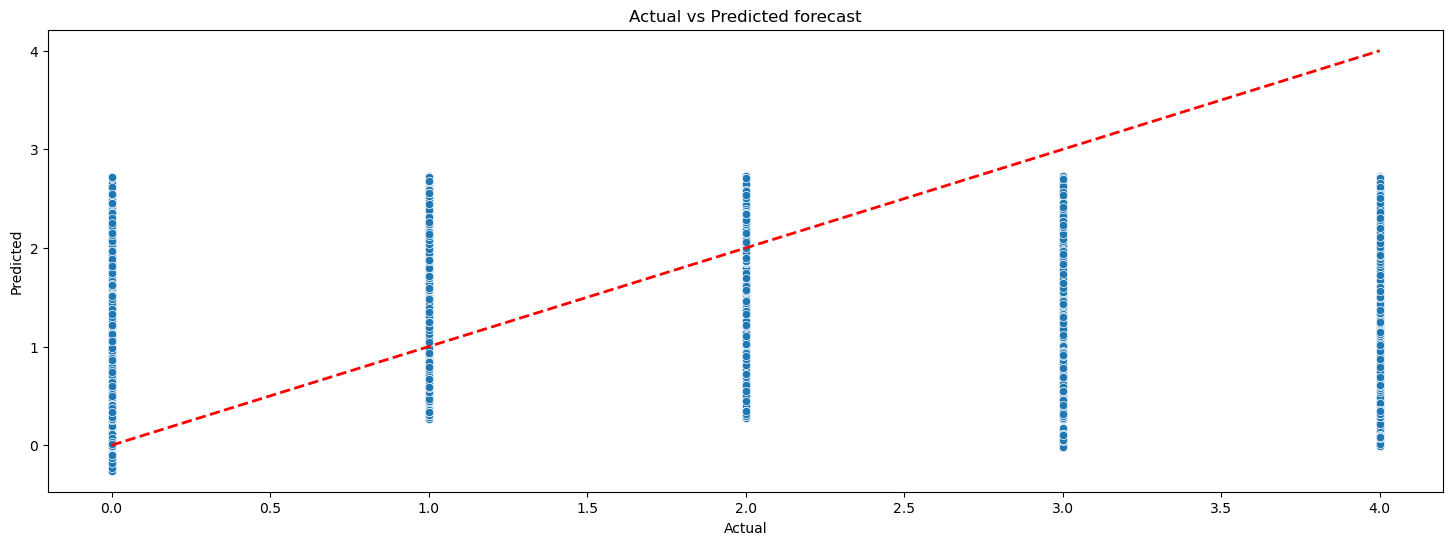

In [76]:
# Plot predictions vs actual
plt.figure(figsize=(18, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],[comparison_df['Actual'].min(), comparison_df['Actual'].max()],'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted forecast')
plt.show()